In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#### Reading the Data

I use pandas to read in the `.csv` file that is in the same directory, in a folder named `data`.  I renamed the columns so I could plot the function easier.

In [2]:
#read the data
df = pd.read_csv('data/sc_uscalc.csv')

In [3]:
#rename the columns
df.columns = ['year', 'slave_price_avg', 'rgdp_percap_us']

<IPython.core.display.Javascript object>


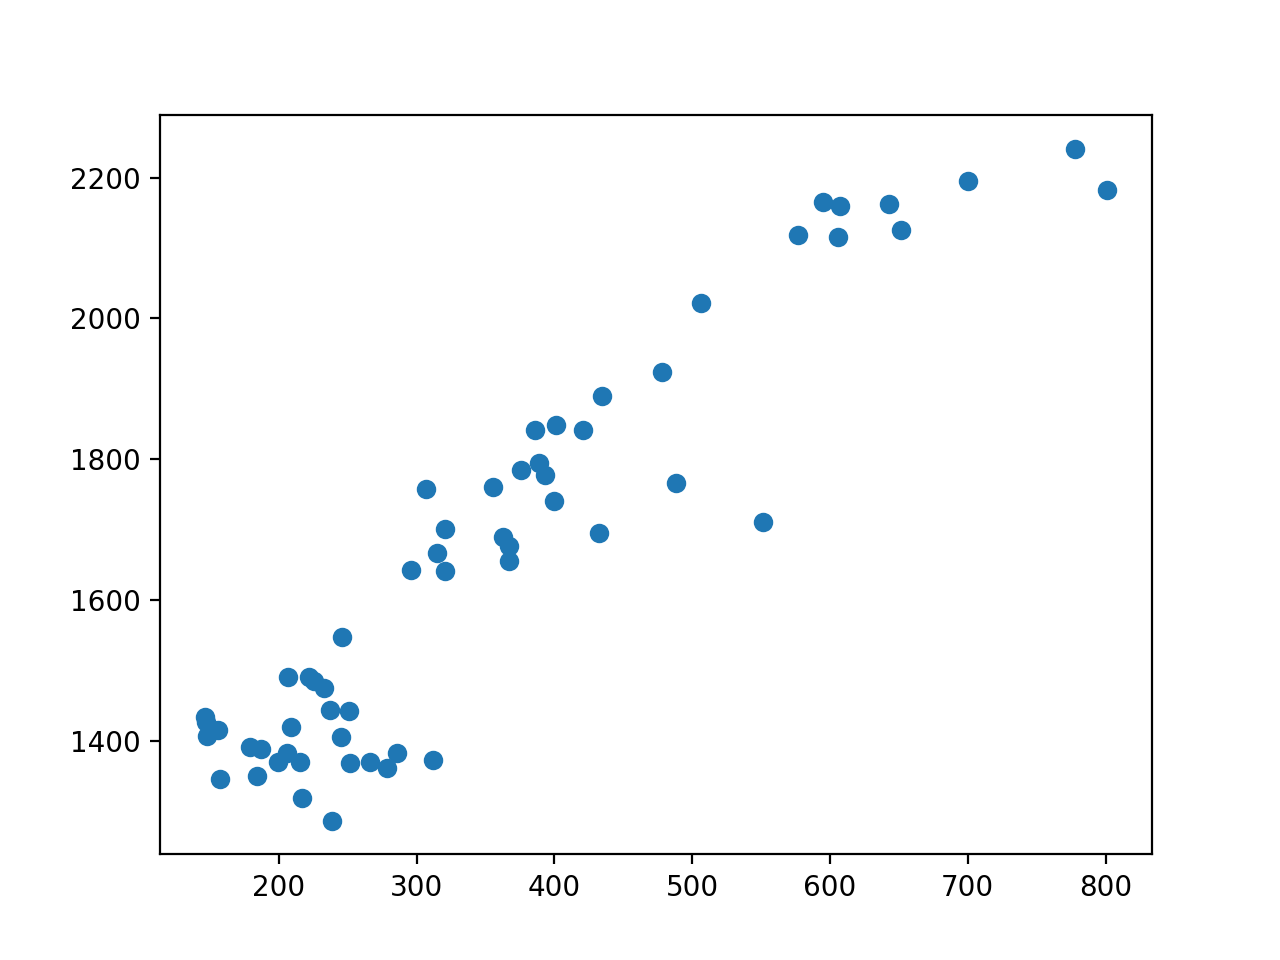

In [4]:
#matplotlib plot
plt.figure()
plt.scatter(df['slave_price_avg'], df['rgdp_percap_us'])

<IPython.core.display.Javascript object>


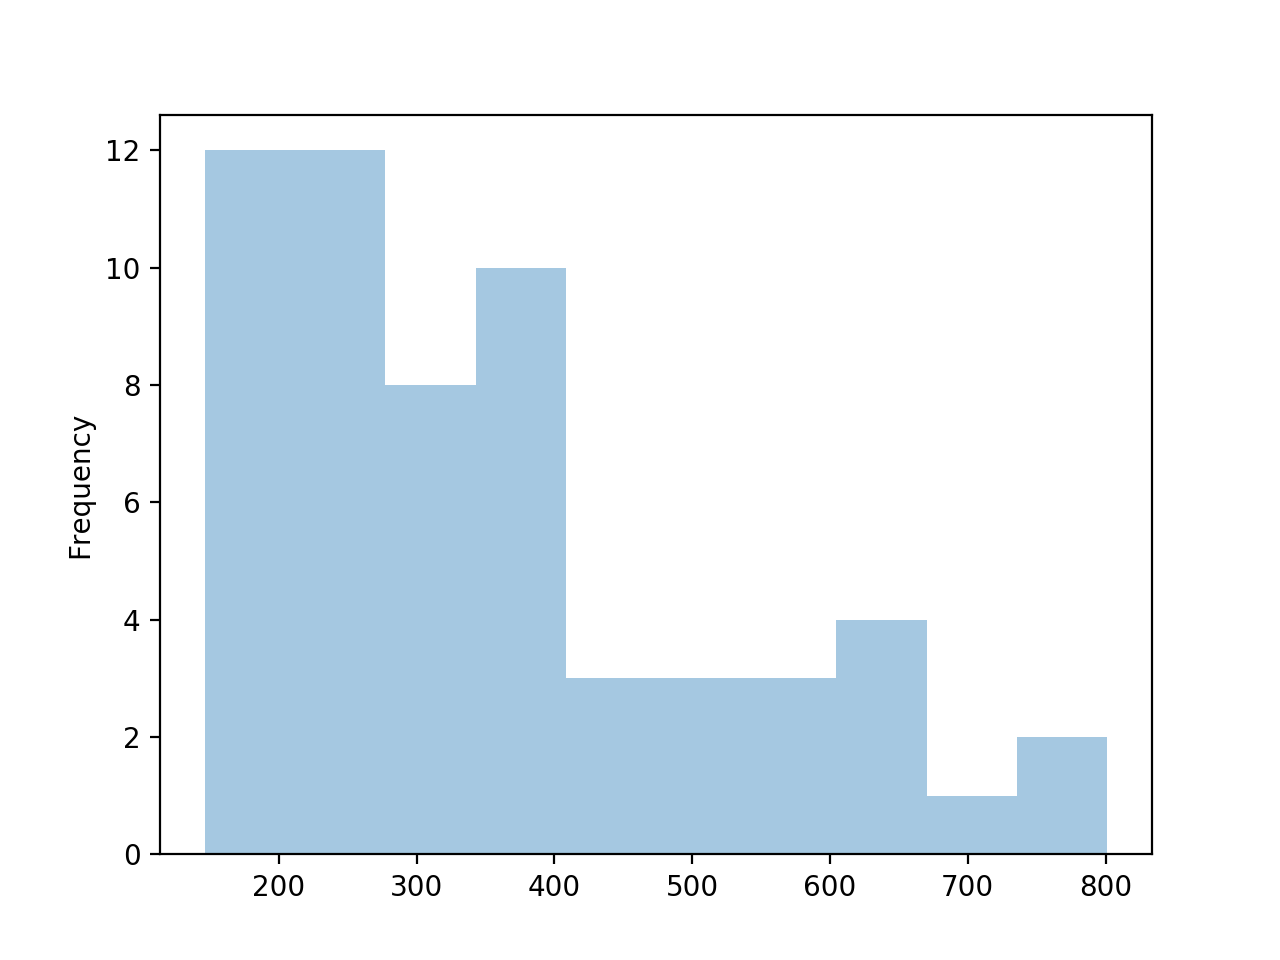

In [5]:
#histogram plot from DataFrame
plt.figure()
df['slave_price_avg'].plot.hist(alpha = 0.4)

There are some `na` values in the data that will cause problems when we try to do a linear regression.  I create a second dataframe where I've dropped the na values.

In [6]:
#drop rows with na values
df2 = df.dropna(axis=0)

In [7]:
df2.describe()

year  slave_price_avg  rgdp_percap_us
count    58.000000        58.000000       58.000000
mean   1832.500000       353.006207     1659.086207
std      16.886879       167.467753      283.607047
min    1804.000000       146.445498     1286.000000
25%    1818.250000       222.749889     1405.250000
50%    1832.500000       313.185724     1648.500000
75%    1846.750000       429.270186     1829.500000
max    1861.000000       801.000000     2241.000000

<IPython.core.display.Javascript object>


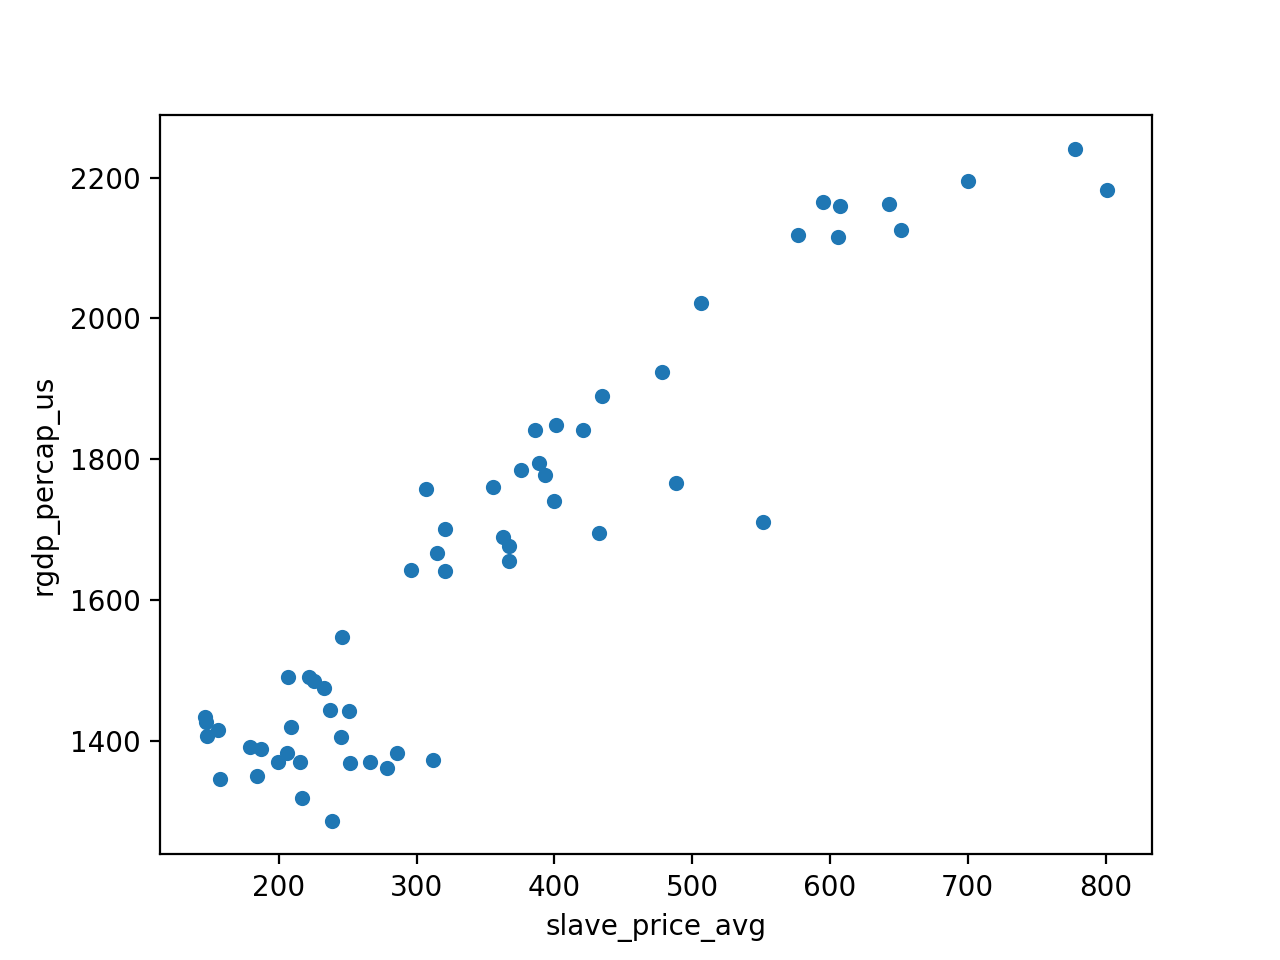

In [8]:
df2.plot.scatter('slave_price_avg', 'rgdp_percap_us')

### Fitting a Polynomial

Recall that to fit a polynomial, we can use the `np.polyfit` function, where the degree of the polynomial is 1.  We can use the `polyval` function to evaluate the function at these values.  For example, to find the line of best fit for the data above, we can type:

```python
coefs_1 =  np.polyfit(df2['slave_price_avg'], df2['rgdp_percap_us'], 1)
x = np.linspace(min(df2['slave_price_avg']), max(df2['slave_price_avg']), 1000)
p1 = np.polyval(coefs_1, x)
```

We could then plot these with `plt.plot(x, p1)`.

In [9]:
#simple linear regression
np.polyfit(df2['slave_price_avg'], df2['rgdp_percap_us'], 1)

array([    1.58303398,  1100.26538653])

In [10]:
#polynomial fitting for degree 1, 2, 3, and 4
coefs_1 =  np.polyfit(df2['slave_price_avg'], df2['rgdp_percap_us'], 1)
coefs_2 =  np.polyfit(df2['slave_price_avg'], df2['rgdp_percap_us'], 2)
coefs_3 =  np.polyfit(df2['slave_price_avg'], df2['rgdp_percap_us'], 3)
coefs_4 =  np.polyfit(df2['slave_price_avg'], df2['rgdp_percap_us'], 4)

In [11]:
#create x values for our fits
x = np.linspace(min(df2['slave_price_avg']), max(df2['slave_price_avg']), 1000)

In [12]:
#evaluate polynomials over our x values
p1 = np.polyval(coefs_1, x)
p2 = np.polyval(coefs_2, x)
p3 = np.polyval(coefs_3, x)
p4 = np.polyval(coefs_4, x)

<IPython.core.display.Javascript object>


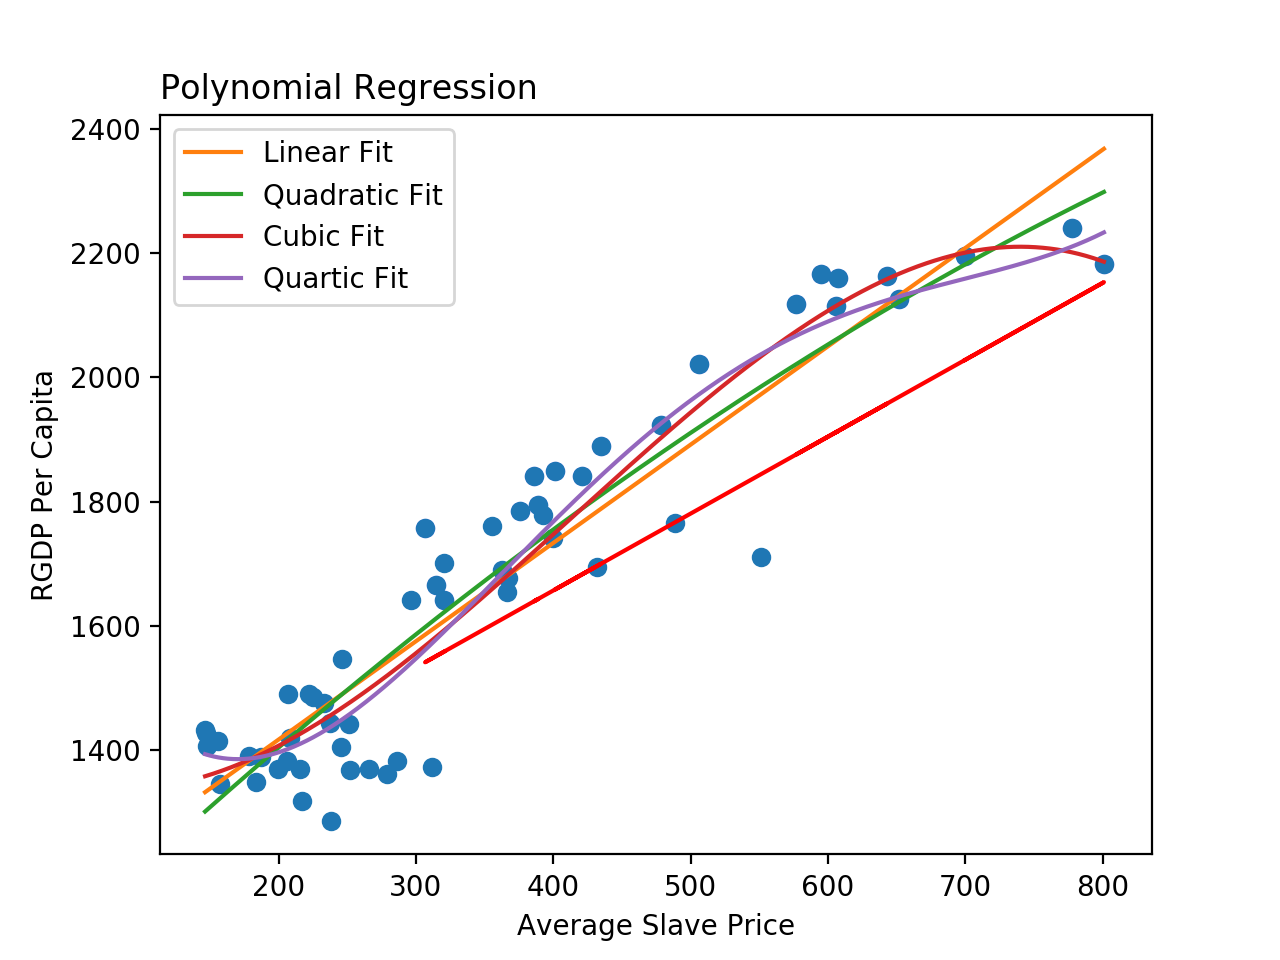

Text(0,0.5,'RGDP Per Capita')

In [13]:
plt.figure()
plt.plot(df2['slave_price_avg'], df2['rgdp_percap_us'], 'o', label = "")

#plot the four fits
plt.plot(x, p1, label = 'Linear Fit')
plt.plot(x, p2, label = 'Quadratic Fit')
plt.plot(x, p3, label = 'Cubic Fit')
plt.plot(x, p4, label = 'Quartic Fit')

#add title and legends
plt.legend(loc = 'best')
plt.title('Polynomial Regression', loc = 'left')
plt.xlabel('Average Slave Price')
plt.ylabel('RGDP Per Capita')

In [92]:
#I can also gather the residuals, rank, singular values, and the rcond
np.polyfit(df2['slave_price_avg'], df2['rgdp_percap_us'], 1, full = True)[1]

array([ 578616.14013869])

In [99]:
residuals = []
for i in range(1,10):
    next = np.polyfit(df2['slave_price_avg'], df2['rgdp_percap_us'], i, full = True)[1]
    residuals.append(next)

<IPython.core.display.Javascript object>


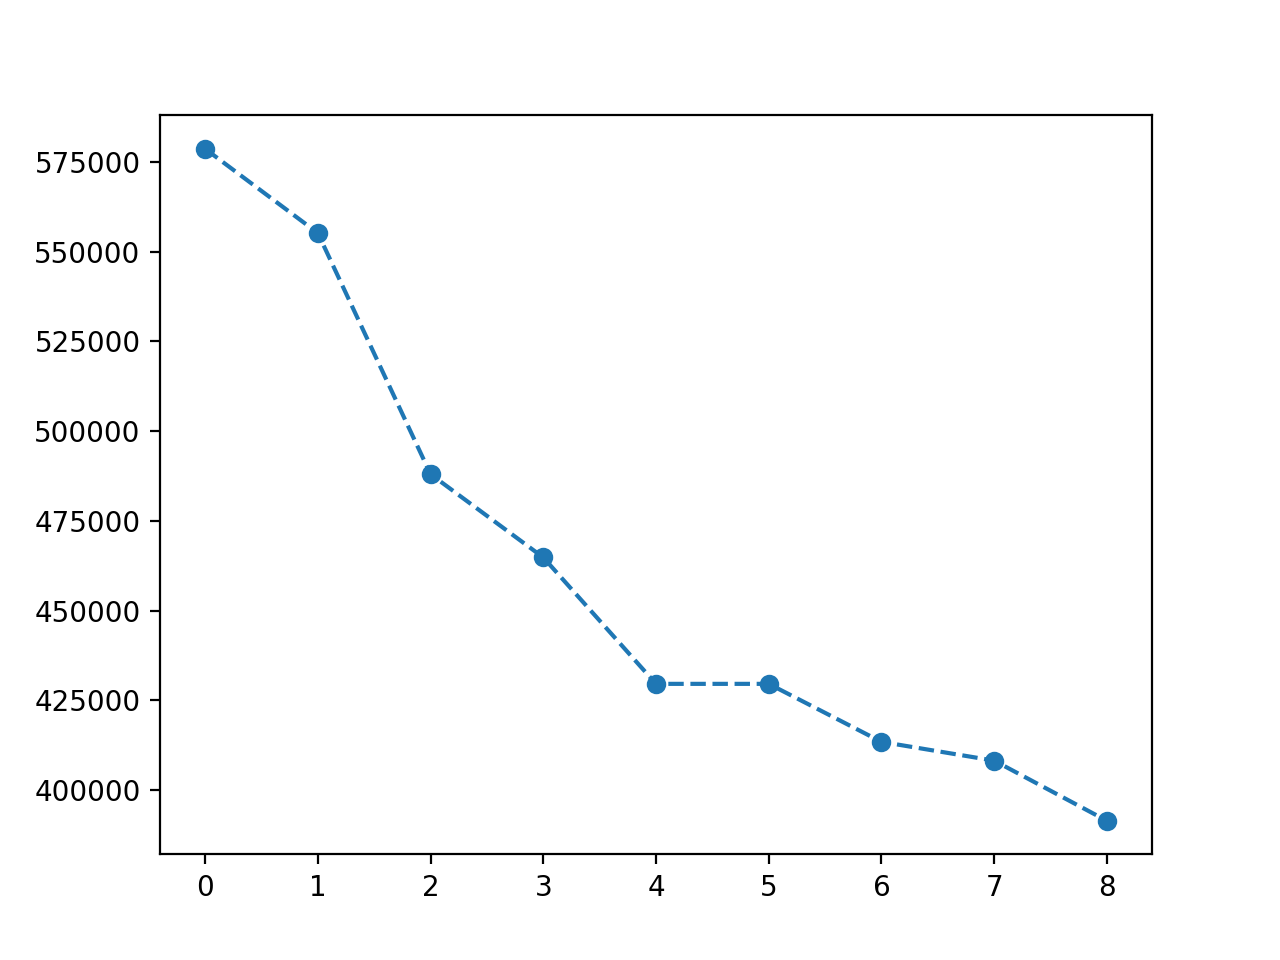

In [101]:
plt.figure()
plt.plot(residuals, '--o')

### Experiment

I wonder if you can investigate the quality of the different polynomial models through an experiment.  First, you will subset the data into a `training` and a `test` set.  

In [16]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.model_selection import cross_val_score

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
LR = LinearRegression()

In [50]:
#reshaping data for splitting
X = df2['slave_price_avg'][:, np.newaxis]

y = df2['rgdp_percap_us'][:, np.newaxis]


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

In [52]:
reg = LR.fit(X_train, y_train)

In [53]:
y_predict = reg.predict(X_test)

In [54]:
reg.coef_

array([[ 1.47616846]])

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
mean_squared_error(y_test, y_predict)

11585.573966341972

In [57]:
r2_score(y_test, y_predict)

0.83017053159034737

<IPython.core.display.Javascript object>


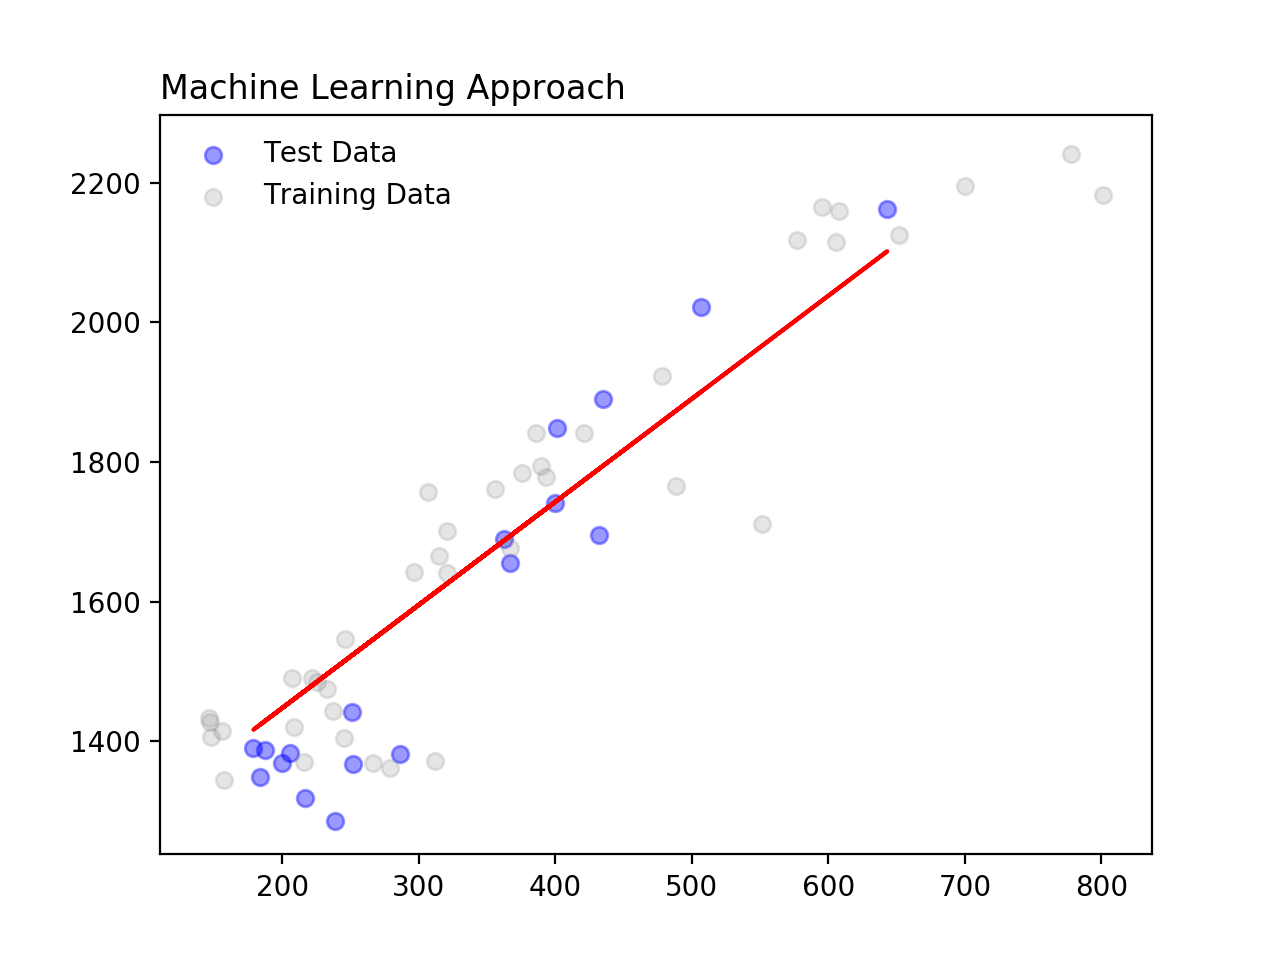

In [77]:
plt.figure()
plt.scatter(X_test, y_test, color = 'blue', alpha = 0.4, label = "Test Data")
plt.scatter(X_train, y_train, color = 'grey', alpha = 0.2, label = "Training Data")
plt.plot(X_test, y_predict, color = 'red')
plt.title("Machine Learning Approach", loc = 'left')
plt.legend(frameon=False)

<IPython.core.display.Javascript object>


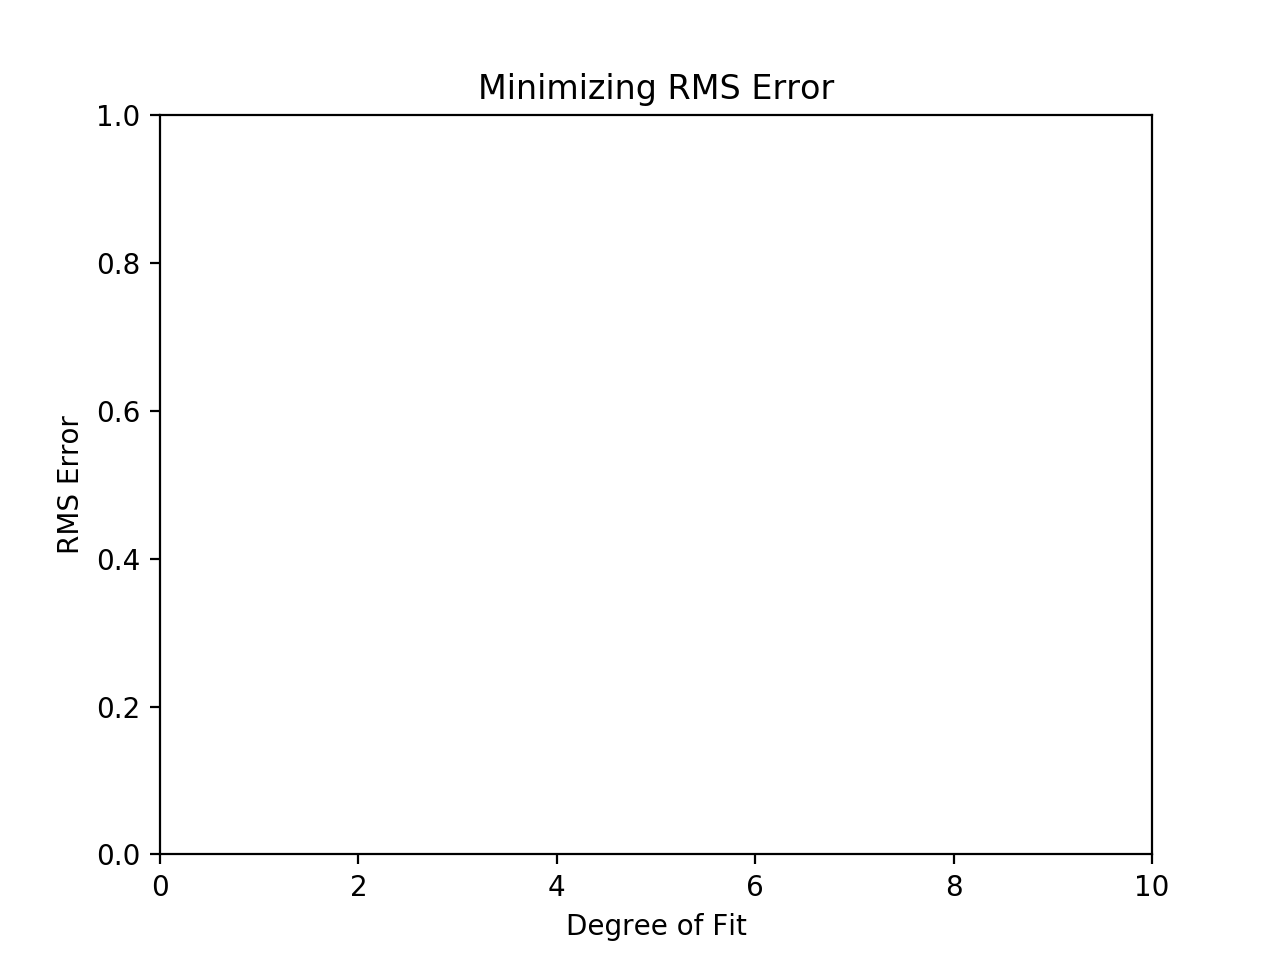

(0, 10)

In [104]:
plt.figure()
plt.title("Minimizing RMS Error")
plt.xlabel("Degree of Fit")
plt.ylabel("RMS Error")
plt.xlim(0,10)

### Polynomial Features

We can use sklearn to examine higher polynomial features.

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4, include_bias = False)
x_new = poly.fit_transform(X)

In [64]:
x_new[:2]

array([[  2.16901409e+02,   4.70462210e+04,   1.02043916e+07,
          2.21334691e+09],
       [  1.57446809e+02,   2.47894975e+04,   3.90302727e+06,
          6.14519187e+08]])

In [66]:
x_new.shape

(58, 4)

In [106]:
model = LinearRegression()
fit = model.fit(x_new, y)

In [107]:
y_pred = model.predict(x_new)
y_pred[:5]

array([[ 1411.23813556],
       [ 1387.56067951],
       [ 1409.93746202],
       [ 1400.74161188],
       [ 1437.77112134]])

<IPython.core.display.Javascript object>


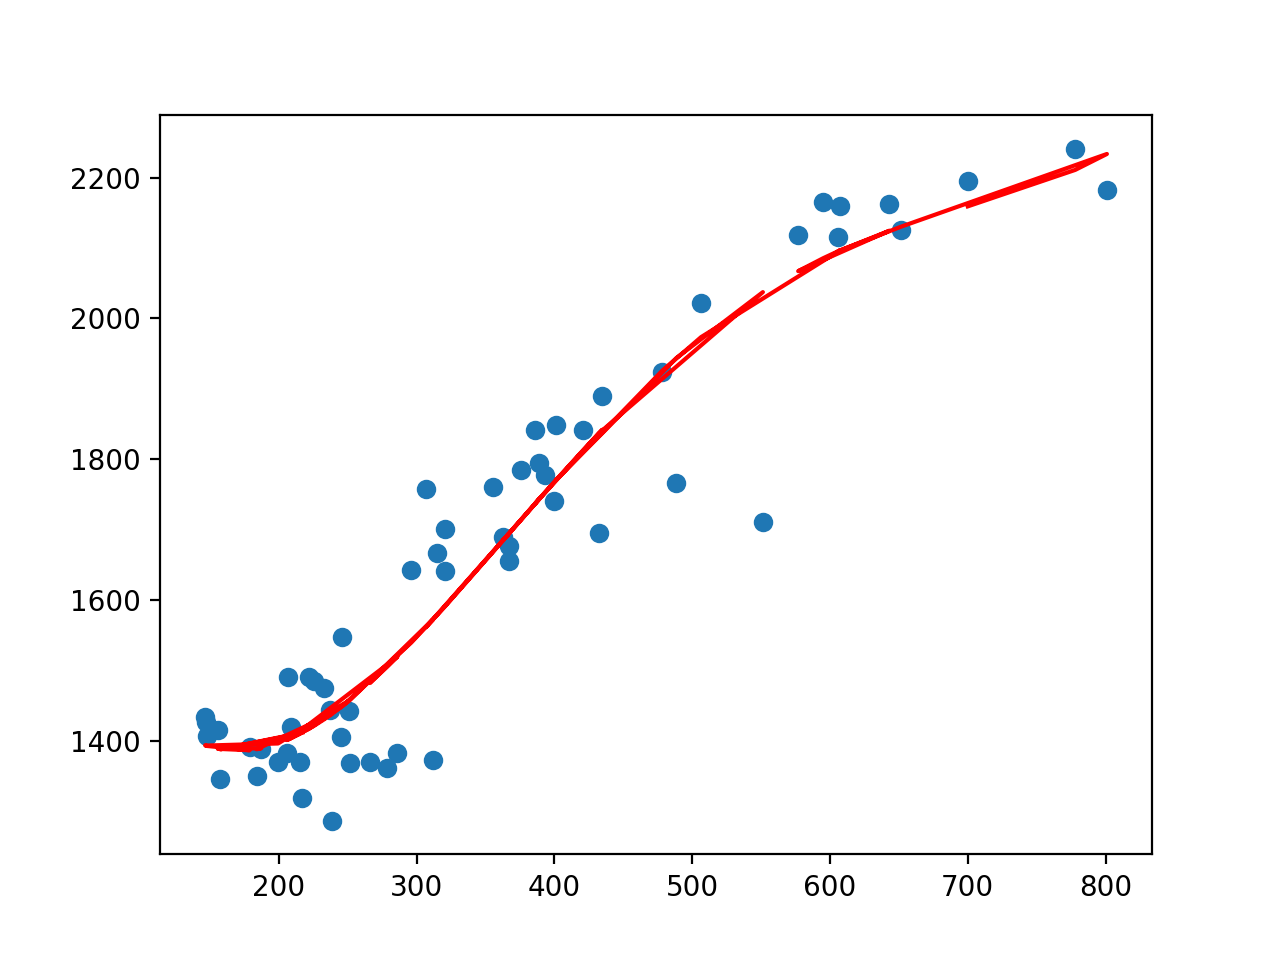

In [108]:
plt.figure()
plt.scatter(X, y)
plt.plot(x_new[:,0], y_pred, 'r')


In [73]:
model.coef_

array([[ -7.72348720e+00,   3.32837390e-02,  -4.64808429e-05,
          2.18785593e-08]])

In [109]:
model.intercept_

array([ 1946.4831268])

In [110]:
from sklearn.model_selection import cross_val_score

In [112]:
scores = cross_val_score(model, X, y, cv = 5)

In [113]:
scores

array([-3.17249295, -7.31494153,  0.02622795, -0.6700787 , -0.52151639])

In [115]:
scores.mean()

-2.3305603272849016